In [1]:
import pca
from scipy import ndimage
from sklearn.datasets import fetch_lfw_people
import sklearn.decomposition
import Image
%pylab inline
import numba

Populating the interactive namespace from numpy and matplotlib


In [78]:
def project_face(basis, face, mean):
    coefs = np.sum(basis*face, axis=1)[np.newaxis]
    reconst = coefs.dot(basis)
    face = mean + reconst
    return face
def center(X):
    return X - np.mean(X, axis=0)
def average(X):
    return np.mean(X, axis=0)

def show_face(face):
    plt.imshow(face.reshape(50,37), cmap=plt.cm.gray)
    
def approximate_face(face, data, pca): 
    pca.pca_mat[0]
    return project_face(pca.pca_mat,face, average(data)).reshape(50,37)

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [5]:
faces = lfw_people.data
faces_small = faces[:30,:]
faces_small_average = average(faces_small)
faces_small_centered = center(faces_small)


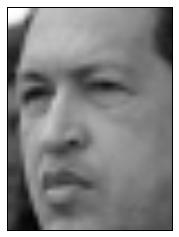

In [122]:
fig = plt.figure()
show_face(faces_small[0, :])
fig.axes[0].get_xaxis().set_visible(False)
fig.axes[0].get_yaxis().set_visible(False)

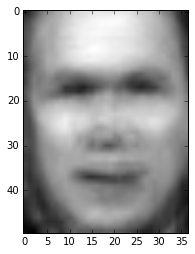

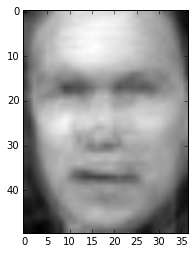

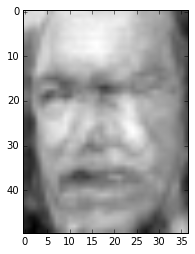

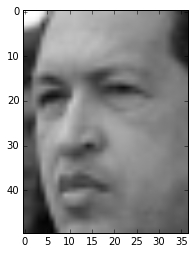

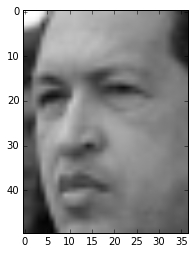

In [48]:
reload(pca)
exact_pcas = [] 
for i in [1,5,10,100,200]:
    exact_pca = pca.ExactPCA(i, faces_small_centered)
    exact_pcas.append(exact_pca)
    plt.figure()
    show_face(approximate_face(faces_small_centered[0, :], faces_small, exact_pca))

(20, 1850)


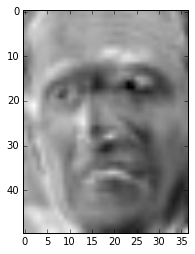

In [110]:
reload(pca)
shamir_pcas = [] 
for i in [20]:
    shamir_pca = pca.ShamirSGDPCA(i, faces_small_centered)
    shamir_pcas.append(shamir_pca)
    plt.figure()
    show_face(approximate_face(faces_small_centered[0, :], faces_small, shamir_pca))

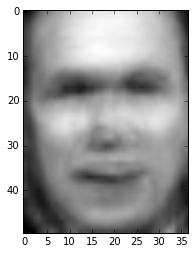

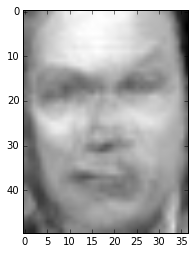

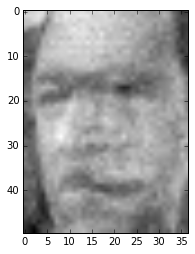

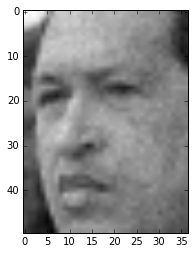

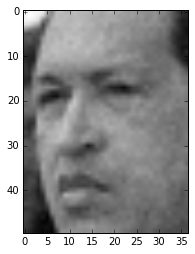

In [47]:
reload(pca)
alecton_pcas = [] 
for i in [1,5,10,100,200]:
    alecton_pca = pca.AlectonPCA(i, faces_small_centered)
    alecton_pcas.append(alecton_pca)
    plt.figure()
    show_face(approximate_face(faces_small_centered[0, :], faces_small, alecton_pca))

In [68]:
m = np.eye(4)

In [73]:
alecton_pcas, exact_pcas

([<pca.AlectonPCA at 0x113f89510>,
  <pca.ExactPCA at 0x115348b10>])

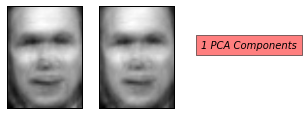

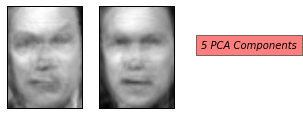

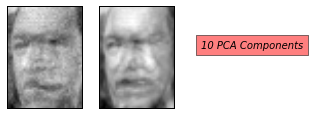

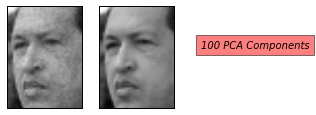

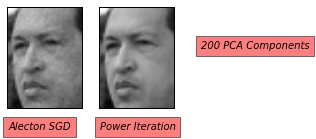

In [107]:
comps = [1,5,10,100,200]
i = 0
for alecton, exact in zip(alecton_pcas, exact_pcas):
    fig = plt.figure()
    fig_1 = fig.add_subplot(2,1,1)
    fig_1.axes.get_xaxis().set_visible(False)
    fig_1.axes.get_yaxis().set_visible(False)
    ax = fig_1.axes
    ax.text(50, 20, '{0} PCA Components '.format(comps[i]), style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
    show_face(approximate_face(faces_small_centered[0, :], faces_small, exact))
    fig_2 = fig.add_subplot(2,2,1)
    show_face(approximate_face(faces_small_centered[0, :], faces_small, alecton))
    fig_2.axes.get_xaxis().set_visible(False)
    fig_2.axes.get_yaxis().set_visible(False)
    i += 1
    
ax = fig_1.axes
ax.text(0, 60, 'Power Iteration', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax = fig_2.axes
ax.text(0, 60, 'Alecton SGD', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

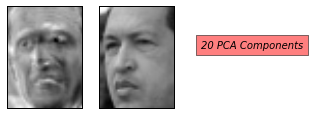

In [114]:
exact_pca_20 = pca.ExactPCA(20, faces_small_centered)
fig = plt.figure()
fig_1 = fig.add_subplot(2,1,1)
fig_1.axes.get_xaxis().set_visible(False)
fig_1.axes.get_yaxis().set_visible(False)
ax = fig_1.axes
ax.text(50, 20, '20 PCA Components' , style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
show_face(approximate_face(faces_small_centered[0, :], faces_small, exact))
fig_2 = fig.add_subplot(2,2,1)
show_face(approximate_face(faces_small_centered[0, :], faces_small, shamir_pcas[0]))
fig_2.axes.get_xaxis().set_visible(False)
fig_2.axes.get_yaxis().set_visible(False)
i += 1

In [152]:
reload(pca)
alecton_pca = pca.AlectonPCA(5, faces_small_centered, step_fn=lambda x: 1)